***
# Easy Cash - Credit Risk Classification
> **Descrição**: Projeto de Classificação com Machine Learning aplicado em Análise de Risco de Crédito de um banco, afim de, identificar possíveis inadimplentes.

***

## 1. BUSINESS UNDERSTANDING

## 2. DATA UNDERSTANDING

In [47]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (12,6))

### Carregando os dados

In [48]:
dados = pd.read_csv('../data/raw/dados_unidos.csv')
dados.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21.0,60000.0,Rent,2.0,Education,B,8000.0,11.26,0.0,0.13,N,3.0
1,40.0,70000.0,Mortgage,6.0,Education,A,18000.0,7.90,0.0,0.26,N,14.0
2,29.0,115000.0,Mortgage,3.0,Medical,C,22000.0,15.23,0.0,0.19,Y,7.0
3,26.0,84996.0,Rent,0.0,Medical,B,9000.0,11.26,0.0,0.11,N,2.0
4,23.0,54500.0,Rent,2.0,Debtconsolidation,A,8000.0,NaN,0.0,0.15,N,2.0


### Alterando a Descrição dos Dados e Colunas

In [49]:
# Declarando dicionário para tradução das colunas (en -> pt)
dict_col_name = {
    'person_age': 'idade_usuario',
    'person_income': 'salario_usuario',
    'person_home_ownership': 'situacao_moradia_usuario',
    'person_emp_length': 'tempo_de_trabalho_usuario',
    'loan_intent': 'motivo_emprestimo',
    'loan_grade': 'pontuacao_emprestimo',
    'loan_amnt': 'valor_emprestimo',
    'loan_int_rate': 'taxa_juros_emprestimo',
    'loan_status': 'status_emprestimo',
    'loan_percent_income': 'renda_percentual_emprestimo',
    'cb_person_default_on_file': 'devendo',
    'cb_person_cred_hist_length': 'tempo_de_credito'
}

# Renomeando Colunas (Axis = 1 -> Coluna)
dados.rename(dict_col_name, axis= 1, inplace=True)

In [50]:
# Declarando dicionário para tradução dos dados das colunas (en -> pt)
dict_situacao_moradia = {
    'Rent': 'Alugada',
    'Own': 'Propria',
    'Mortgage': 'Hipotecada',
    'Other': 'Outros'
}

dict_motivo_emprestimo = {
    'Personal':'Pessoal',
    'Education': 'Educativo',
    'Medical':'Medico',
    'Venture':'Empreendimento',
    'Homeimprovement': 'Melhoria do Lar',
    'Debtconsolidation': 'Pagamento de Debitos'
}

# Renomeando dados das linhas (Axis = 0 -> Linha)
dados.replace(dict_situacao_moradia, inplace=True)
dados.replace(dict_motivo_emprestimo, inplace=True)

### Exploração dos Dados
Neste Dataset, a coluna `status_emprestimo` mostra se o empréstimo está atualmente inadimplente = 1 e Não-Inadimplente= 0.

No dataset tem mais colunas nos dados e muitas podem ter um relacionamento com os valores em `status_emprestimo`. Precisa explorar mais os dados e essas relações com uma análise mais aprofundada para entender o impacto dos dados nas inadimplências de empréstimos de crédito.

Verificar a estrutura dos dados, bem como ver um fotografia, nos ajuda a entender melhor o que está dentro do conjunto. Da mesma forma, as visualizações fornecem uma visão de alto nível dos dados, além de tendências e padrões importantes.


In [51]:
# Verificando a qtd de registros
print(f'Tamanho do Dataset: {dados.shape[0]}')

Tamanho do Dataset: 34501


In [52]:
# Verificando a taxa de inadimplentes
inadimplentes_perc = dados['devendo'].value_counts(normalize= True)
print(f'A Taxa de Pessoas com histórico de inadimplência é de {(inadimplentes_perc[1] * 100).round(2)}%')

A Taxa de Pessoas com histórico de inadimplência é de 17.59%


In [53]:
# Verificando informações do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34501 entries, 0 to 34500
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade_usuario                34177 non-null  float64
 1   salario_usuario              34162 non-null  float64
 2   situacao_moradia_usuario     34170 non-null  object 
 3   tempo_de_trabalho_usuario    33247 non-null  float64
 4   motivo_emprestimo            34186 non-null  object 
 5   pontuacao_emprestimo         34188 non-null  object 
 6   valor_emprestimo             34170 non-null  float64
 7   taxa_juros_emprestimo        30871 non-null  float64
 8   status_emprestimo            34158 non-null  float64
 9   renda_percentual_emprestimo  34182 non-null  float64
 10  devendo                      34131 non-null  object 
 11  tempo_de_credito             34497 non-null  float64
dtypes: float64(8), object(4)
memory usage: 3.2+ MB


### Verificando a distribuição do valor de emprestimo

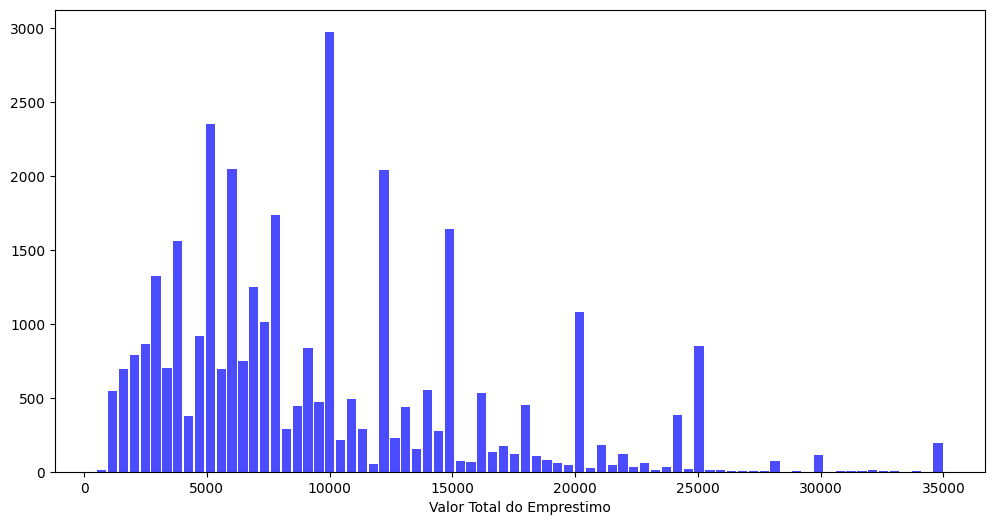

In [54]:
# Olhando a distribuição do valor de emprestimo com um histograma
n, bins, patches = plt.hist(x=dados['valor_emprestimo'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Valor Total do Emprestimo")
plt.show()

### Plotando um Scatter Plot 
Verificando a relação entre a variável independente (`idade_usuario`) e a variável dependente (`salario_usuario`).

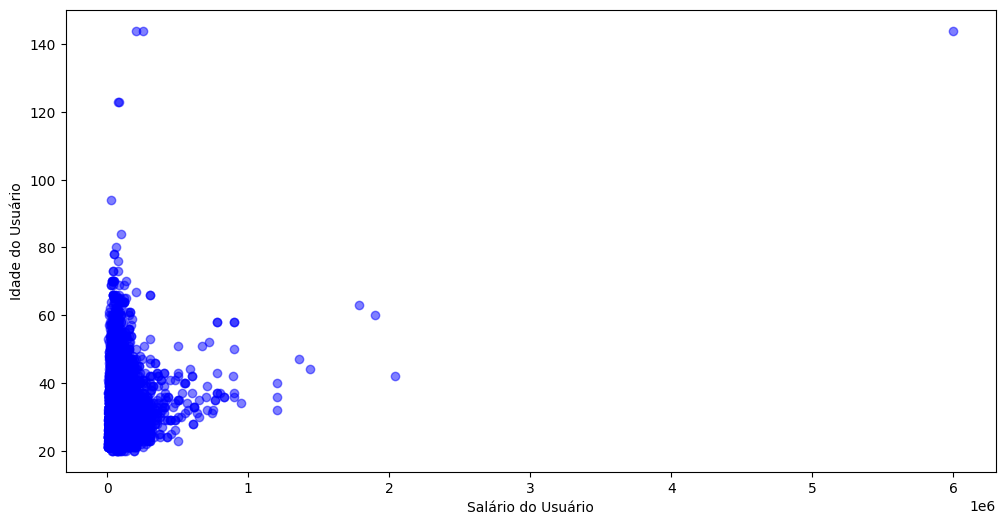

In [55]:
# Plotando um gráfico de dispersão entre a idade e o salário do usuário
plt.scatter(x = dados['salario_usuario'], y = dados['idade_usuario'], c ='blue', alpha = 0.5)
plt.xlabel('Salário do Usuário')
plt.ylabel('Idade do Usuário')
plt.show()

Já podemos ver uma correlação positiva com idade e renda, o que pode significar que essas pessoas mais velhos estão mais avançados em suas carreiras e, portanto, ganham salários mais altos. Também é possível identificar a presença de ***outiliers.***

### Análise Exploratória com Tabela Cruzada

Dados Financeiros geralmente são visualizados em formato de tabelas parecidos com planilhas em excel, sendo assim, vamos usar o método  pd.crosstab() para visualizar melhor.

Para a maioria dos modelos de risco de crédito, especialmente para probabilidade de inadimplência, colunas como `tempo_de_trabalho_usuario` e `moradia_usuario` são comuns para começar a investigar.

Você poderá ver como os valores são preenchidos nos dados e visualizá-los. Por enquanto, você precisa verificar como o "status_do_emprestimo" é afetado por fatores como o status da moradiaa, o grau do empréstimo e a porcentagem da renda do empréstimo.

In [56]:
pd.crosstab(index=dados['situacao_moradia_usuario'], columns= dados['status_emprestimo'],
            values=dados['taxa_juros_emprestimo'], aggfunc='mean').round(2)

status_emprestimo,0.0,1.0
situacao_moradia_usuario,,
Alugada,10.75,12.97
Hipotecada,10.06,13.42
Outros,11.41,13.74
Propria,10.75,12.32


In [59]:
pd.crosstab(index= dados['motivo_emprestimo'], columns= dados['status_emprestimo'], margins = True)

status_emprestimo,0.0,1.0,All
motivo_emprestimo,,,
Educativo,5529,1173,6702
Empreendimento,5045,887,5932
Medico,4643,1674,6317
Melhoria do Lar,2789,968,3757
Pagamento de Debitos,3892,1532,5424
Pessoal,4585,1144,5729
All,26483,7378,33861


In [63]:
pd.crosstab(index= dados['situacao_moradia_usuario'], columns= dados['status_emprestimo'],
              values=dados['renda_percentual_emprestimo'], aggfunc='mean')

status_emprestimo,0.0,1.0
situacao_moradia_usuario,,
Alugada,0.144940,0.264224
Hipotecada,0.146539,0.186730
Outros,0.144133,0.306471
Propria,0.179491,0.296364


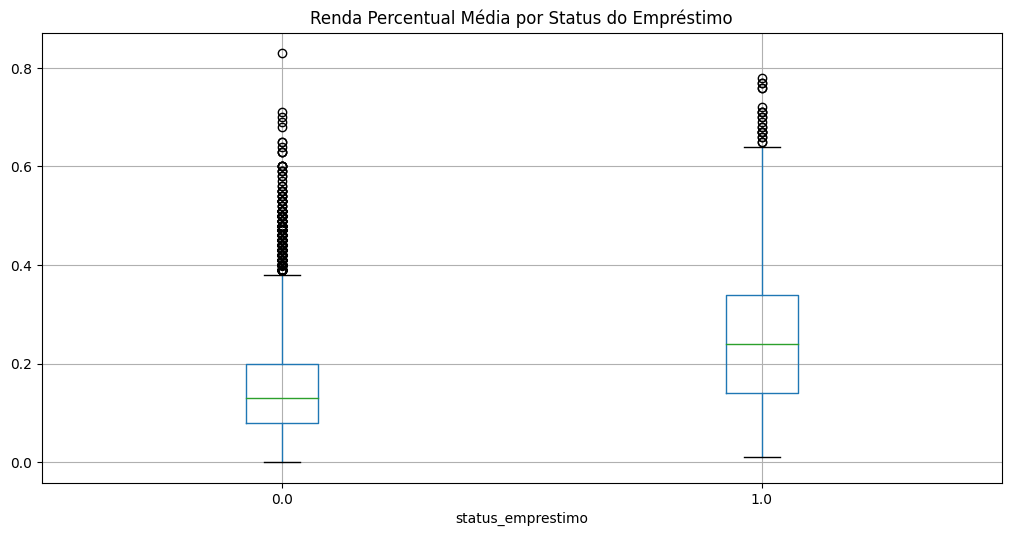

In [64]:
# Box Plot da Renda Percentual Média por Status do Empréstimo
dados.boxplot(column = ['renda_percentual_emprestimo'], by = 'status_emprestimo')
plt.title('Renda Percentual Média por Status do Empréstimo')
plt.suptitle('')
plt.show()

A porcentagem média de renda para inadimplentes (=1) é maior do que os adimplentes. Isso pode indicar que essas pessoas têm uma relação dívida/renda que já é muito alta.